In [1]:
#Import the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment=None

In [3]:
#Import all the CSV files

In [4]:
order_products_train_df=pd.read_csv('order_products__train.csv')
order_df=pd.read_csv('orders.csv')
products_df=pd.read_csv('products.csv')
aisles_df=pd.read_csv('aisles.csv')
departments_df=pd.read_csv('departments.csv')

In [5]:
#View the data

In [6]:
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
count_str=order_df['eval_set'].value_counts()

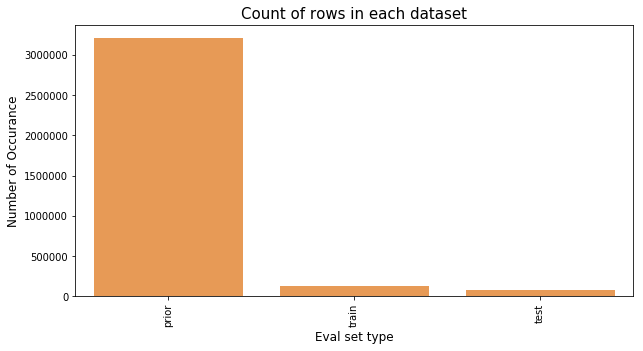

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(count_str.index,count_str.values,alpha=0.8,color=color[1])
plt.xlabel('Eval set type',fontsize=12)
plt.ylabel('Number of Occurance',fontsize=12)
plt.title('Count of rows in each dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
order_df['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [11]:
count_set=order_df.groupby('eval_set')['user_id'].nunique()

In [12]:
count_set

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [13]:
#Dispay the top 10 user id which has given maximum orders

In [14]:
count_set=order_df.groupby('user_id')["order_number"].aggregate(np.sum).reset_index()

In [15]:
count_set=count_set['order_number'].value_counts()

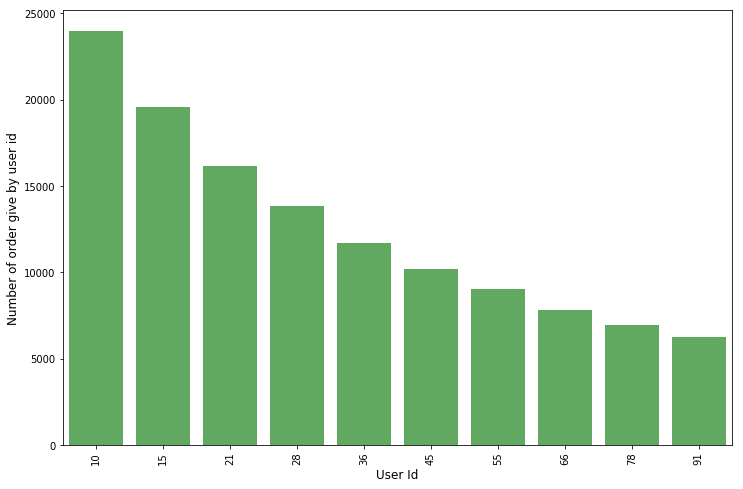

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(count_set.index[:10],count_set.values[:10],alpha=0.8,color=color[2])
plt.xlabel("User Id", fontsize=12)
plt.ylabel('Number of order give by user id',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
#Frequence of order by day of week

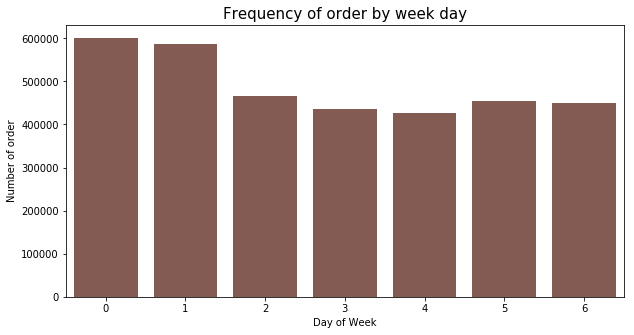

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_dow',data=order_df,color=color[5])
plt.title("Frequency of order by week day", fontsize=15)
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Number of order',fontsize=10)
plt.show()

In [19]:
#Now visulize the order at hour level

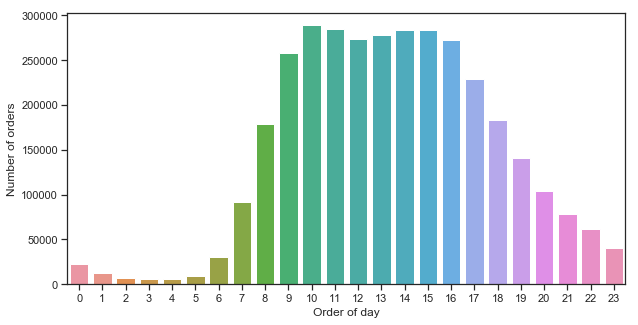

In [20]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day',data=order_df)
plt.xlabel('Order of day',fontsize=12)
plt.ylabel('Number of orders',fontsize=12)
plt.show()

In [21]:
grouped_df=order_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

In [22]:
grouped_df=grouped_df.pivot('order_dow','order_hour_of_day','order_number')

Text(0.5,1,'Frequency of Day of week Vs Hour of day')

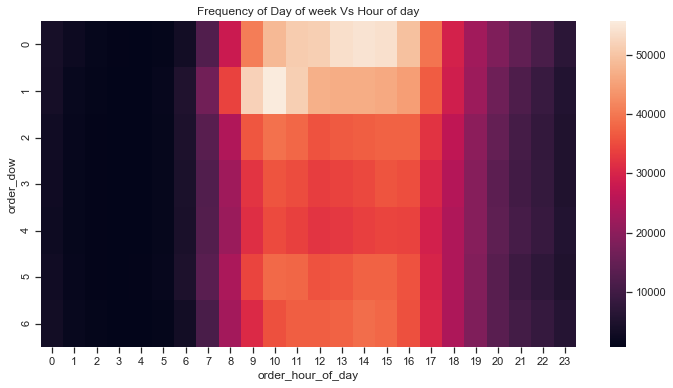

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")

In [24]:
#Check the how frequently was placed

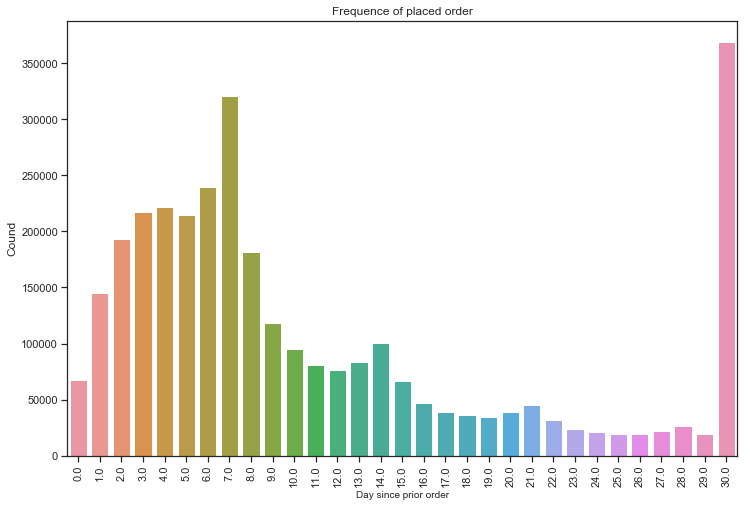

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order',data=order_df)
plt.ylabel("Cound", fontsize=12)
plt.xlabel('Day since prior order',fontsize=10)
plt.xticks(rotation='vertical')
plt.title('Frequence of placed order')
plt.show()

In [26]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [27]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [28]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [29]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [30]:
order_product_prior_df=pd.merge(order_products_train_df,products_df,on='product_id',how='left')

In [31]:
order_product_prior_df=pd.merge(order_product_prior_df,aisles_df,on='aisle_id',how='left')

In [32]:
order_product_prior_df=pd.merge(order_product_prior_df,departments_df,on='department_id',how='left')

In [33]:
order_product_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [34]:
product_count=order_product_prior_df['product_name'].value_counts().reset_index().head(20)

In [35]:
product_count.columns=['product_name','frequency_count']

In [36]:
product_count.head()

,product_name,frequency_count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135


In [37]:
count_sts=order_product_prior_df['aisle'].value_counts().head(20)

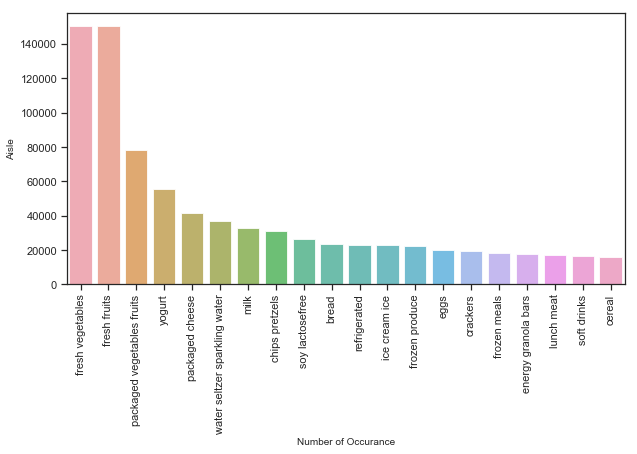

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(count_sts.index,count_sts.values,alpha=0.8)
plt.xlabel('Number of Occurance',fontsize=10)
plt.ylabel("Aisle",fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
#Department Distribution

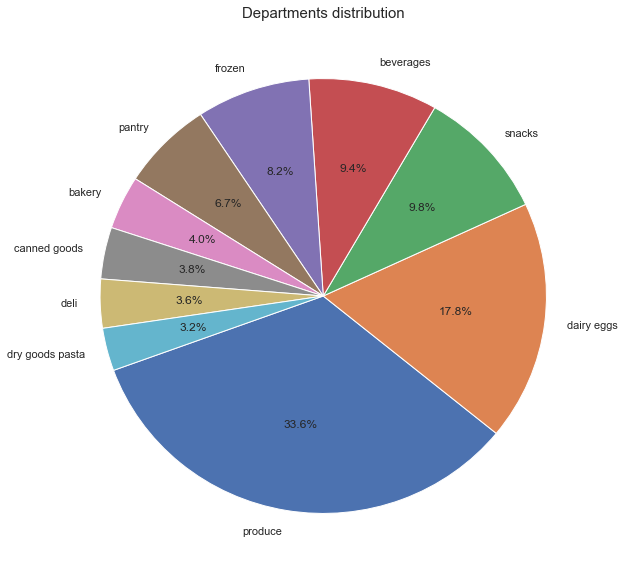

In [40]:
plt.figure(figsize=(10,10))
dept=order_product_prior_df['department'].value_counts().head(10)
labels=(np.array(dept.index))
sizes=(np.array((dept/dept.sum()) *100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Departments distribution',fontsize=15)
plt.show()

In [41]:
#Department wise reorder ratio

In [42]:
grouped_df=order_product_prior_df.groupby(["department"])["reordered"].aggregate('mean').reset_index()

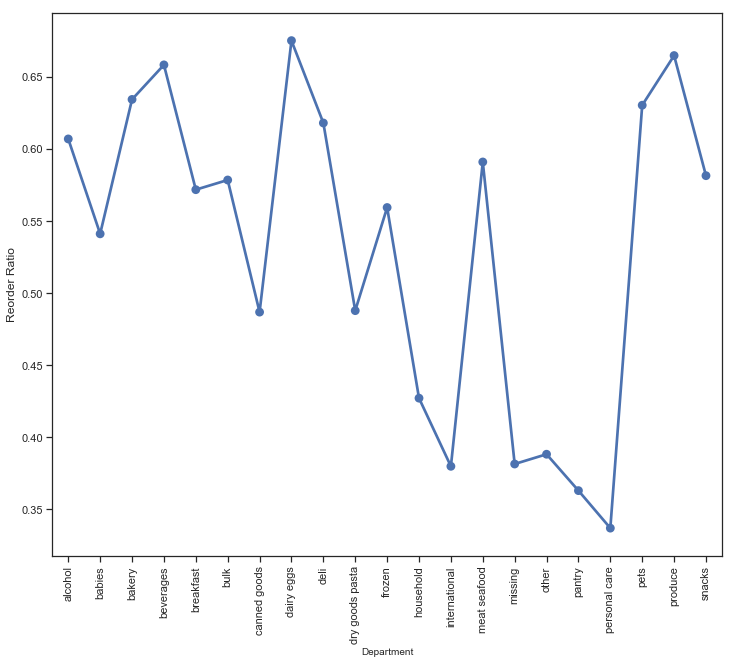

In [43]:
plt.figure(figsize=(12,10))
sns.pointplot(grouped_df['department'].values,grouped_df['reordered'].values)
plt.ylabel('Reorder Ratio',fontsize=12)
plt.xlabel('Department',fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
#Aisle-Reorde ratio

In [45]:
grouped_df=order_product_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate('mean').reset_index().head(100)

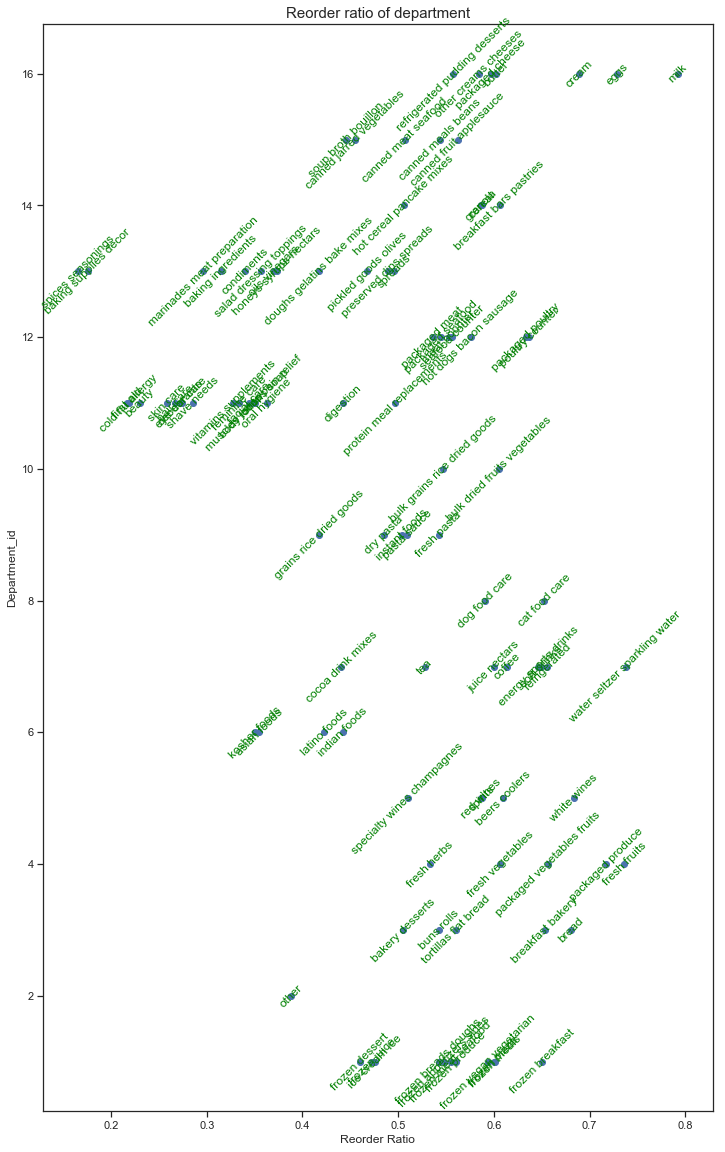

In [46]:
fig,ax=plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values,grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt,(grouped_df.reordered.values[i],grouped_df.department_id.values[i]), rotation=45,ha='center',va='center',
               color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('Department_id')
plt.title('Reorder ratio of department',fontsize=15)
plt.show()

In [47]:
#Add to cart re-order ratio

In [48]:
order_product_prior_df['add_to_cart_order_mod']=order_product_prior_df['add_to_cart_order'].copy()

In [49]:
order_product_prior_df['add_to_cart_order_mod'].loc[order_product_prior_df['add_to_cart_order_mod']>70]=70

In [50]:
grouped_df=order_product_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate("mean").reset_index()

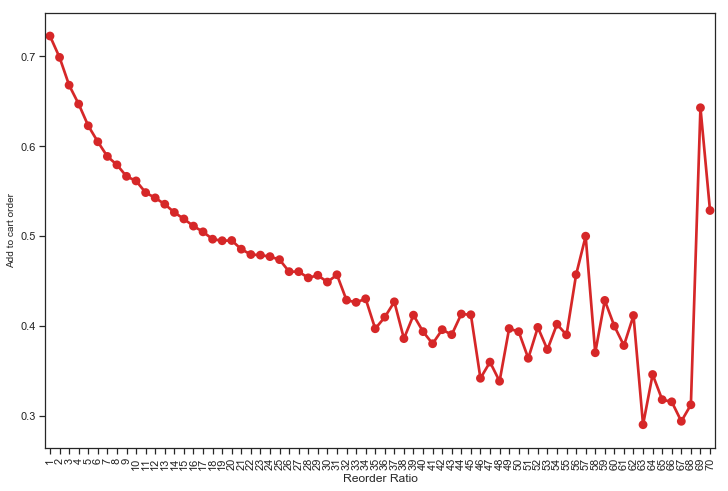

In [51]:
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values,grouped_df['reordered'].values,alpha=0.8,color=color[3])
plt.xlabel('Reorder Ratio',fontsize=12)
plt.ylabel('Add to cart order',fontsize=10)
plt.xticks(rotation='vertical')
plt.show()